In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# To Display all columns in a dataframe
pd.set_option('display.max_columns', None)

In [189]:
# reading the data
file_path = r'data\TimeSaved_Data.xlsx'

In [190]:
data = pd.read_excel(file_path)
data.head(2)

,project_id,projectname,package_name,Scope of Work,Software Platform,lod,contracthours,tradep,project_days,Time Saved Per Hit Count (Hrs)
0,75681,55 Premier Series (45' Product) - B45L - Aurora,Pi Dock,"3D Modeling,Construction Drawing Set",Revit 2019,300.0,249.0,Architecture,383,0.000002
1,75681,55 Premier Series (45' Product) - B45L - Aurora,Pi Navisworks,"3D Modeling,Construction Drawing Set",Revit 2019,300.0,249.0,Architecture,383,0.029735


In [191]:
data.columns = [col.replace(" ","_").lower() for col in data.columns]

In [192]:
data.head(2)

,project_id,projectname,package_name,scope_of_work,software_platform,lod,contracthours,tradep,project_days,time_saved_per_hit_count_(hrs)
0,75681,55 Premier Series (45' Product) - B45L - Aurora,Pi Dock,"3D Modeling,Construction Drawing Set",Revit 2019,300.0,249.0,Architecture,383,0.000002
1,75681,55 Premier Series (45' Product) - B45L - Aurora,Pi Navisworks,"3D Modeling,Construction Drawing Set",Revit 2019,300.0,249.0,Architecture,383,0.029735


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   project_id                      2665 non-null   int64  
 1   projectname                     2665 non-null   object 
 2   package_name                    2627 non-null   object 
 3   scope_of_work                   2665 non-null   object 
 4   software_platform               2665 non-null   object 
 5   lod                             1886 non-null   float64
 6   contracthours                   2665 non-null   float64
 7   tradep                          2665 non-null   object 
 8   project_days                    2665 non-null   int64  
 9   time_saved_per_hit_count_(hrs)  2579 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 208.3+ KB


In [194]:
data.shape

(2665, 10)

In [195]:
# checking the data for NULL
data.isnull().sum()

project_id                          0
projectname                         0
package_name                       38
scope_of_work                       0
software_platform                   0
lod                               779
contracthours                       0
tradep                              0
project_days                        0
time_saved_per_hit_count_(hrs)     86
dtype: int64

In [196]:
# Dropping the Null records from package name and time save
data = data.dropna(axis=0, subset=['package_name', 'time_saved_per_hit_count_(hrs)'], inplace=False)

In [197]:
# Replacing the null lod values with median 
data['lod'] = data['lod'].fillna(data['lod'].median(), inplace=False)

In [198]:
data.isnull().sum()

project_id                        0
projectname                       0
package_name                      0
scope_of_work                     0
software_platform                 0
lod                               0
contracthours                     0
tradep                            0
project_days                      0
time_saved_per_hit_count_(hrs)    0
dtype: int64

In [199]:
data.head()

,project_id,projectname,package_name,scope_of_work,software_platform,lod,contracthours,tradep,project_days,time_saved_per_hit_count_(hrs)
0,75681,55 Premier Series (45' Product) - B45L - Aurora,Pi Dock,"3D Modeling,Construction Drawing Set",Revit 2019,300.0,249.0,Architecture,383,0.000002
1,75681,55 Premier Series (45' Product) - B45L - Aurora,Pi Navisworks,"3D Modeling,Construction Drawing Set",Revit 2019,300.0,249.0,Architecture,383,0.029735
3,64254,UC New ED Surgery Infill,Pi Mechanical,2D Drawings,Revit Fabrication,400.0,212.0,Mechanical Sheet Metal,578,1.067006
4,31571,Via Mizner,Pi Mechanical,"BIM Coordination,Shop Drawings","Revit-2018,AutoCAD",400.0,36.0,Plumbing,110,0.140591
5,31758,"YMCA, Milton Keynes",Pi Mechanical,"3D Modeling,Coordination,COBie,Shop Drawings,B...",Revit-2019,400.0,4662.0,"Mechanical,Electrical,Plumbing",1068,0.037221


### Handelling package column

In [200]:
package_list = data['package_name'].unique().tolist()

In [201]:
df_package_grouped = data.groupby(by=['project_id'])['package_name'].aggregate(','.join).reset_index().sort_values(by='project_id', ascending=False)
print(df_package_grouped.shape)
df_package_grouped.head()

(1323, 2)


,project_id,package_name
1322,78348,Pi Mechanical
1321,78326,Pi Electrical
1320,78302,"Pi Electrical,Pi Mechanical,Pi Quality"
1319,78298,"Pi Electrical,Pi Mechanical"
1318,78297,Pi Mechanical


In [202]:
# df_package_grouped['package_name'].apply(lambda x: 1 if 'Pi Mechanical' in x else 0)

In [203]:
for package in package_list:
    df_package_grouped['package_' + package.lower()] = df_package_grouped['package_name'].apply(lambda x: 1 if str(package) in str(x) else 0)

In [204]:
df_package_grouped.head()

,project_id,package_name,package_pi dock,package_pi navisworks,package_pi mechanical,package_pi quality,package_pi electrical,package_pi scrum,package_pi acs,package_pi document package,package_pi swr,package_pi common package,package_pi mep package,package_pi plant3d,package_pi mechanical package,package_pi scrum package
1322,78348,Pi Mechanical,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1321,78326,Pi Electrical,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1320,78302,"Pi Electrical,Pi Mechanical,Pi Quality",0,0,1,1,1,0,0,0,0,0,0,0,0,0
1319,78298,"Pi Electrical,Pi Mechanical",0,0,1,0,1,0,0,0,0,0,0,0,0,0
1318,78297,Pi Mechanical,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### Handelling Scope of work column

In [205]:
data.head(2)

,project_id,projectname,package_name,scope_of_work,software_platform,lod,contracthours,tradep,project_days,time_saved_per_hit_count_(hrs)
0,75681,55 Premier Series (45' Product) - B45L - Aurora,Pi Dock,"3D Modeling,Construction Drawing Set",Revit 2019,300.0,249.0,Architecture,383,0.000002
1,75681,55 Premier Series (45' Product) - B45L - Aurora,Pi Navisworks,"3D Modeling,Construction Drawing Set",Revit 2019,300.0,249.0,Architecture,383,0.029735


In [206]:
df_scopeofwork_grouped = data.groupby(by=['project_id'])['scope_of_work'].aggregate(','.join).reset_index().sort_values(by='project_id', ascending=False)
print(df_scopeofwork_grouped.shape)
df_scopeofwork_grouped.head()

(1323, 2)


,project_id,scope_of_work
1322,78348,"3D Modeling,2D Drawings"
1321,78326,Shop drawings
1320,78302,"3D Modeling,3D Modeling,3D Modeling"
1319,78298,"3D Modeling,3D Modeling"
1318,78297,"3D Modeling,Coordination,Shop Drawings"


In [207]:
scopeofwork_list = df_scopeofwork_grouped['scope_of_work'].str.split(',').explode().str.replace(" ","").str.lower().unique().tolist()
print(len(scopeofwork_list))
# scopeofwork_list

344


## Handling Software Platform

In [208]:
data.head(2)

,project_id,projectname,package_name,scope_of_work,software_platform,lod,contracthours,tradep,project_days,time_saved_per_hit_count_(hrs)
0,75681,55 Premier Series (45' Product) - B45L - Aurora,Pi Dock,"3D Modeling,Construction Drawing Set",Revit 2019,300.0,249.0,Architecture,383,0.000002
1,75681,55 Premier Series (45' Product) - B45L - Aurora,Pi Navisworks,"3D Modeling,Construction Drawing Set",Revit 2019,300.0,249.0,Architecture,383,0.029735


In [209]:
df_software_grouped = data.groupby(by=['project_id'])['software_platform'].aggregate(','.join).reset_index().sort_values(by='project_id', ascending=False)
print(df_software_grouped.shape)
df_software_grouped.head()

(1323, 2)


,project_id,software_platform
1322,78348,"Revit, AutoCAD"
1321,78326,Revit Fabrication
1320,78302,"Revit 2021, Recap,Revit 2021, Recap,Revit 2021..."
1319,78298,"Revit 2022, Recap,Revit 2022, Recap"
1318,78297,"Revit Fabrication, Navisworks"


In [210]:
df_software_grouped['software_platform'] = df_software_grouped['software_platform'].apply(lambda x: re.sub(r'\d', '', x))

In [211]:
software_list = df_software_grouped['software_platform'].str.split(',').explode().str.replace(" ","").str.lower().unique().tolist()
print(len(software_list))

127


In [212]:
# df_software_grouped[df_software_grouped['project_id']==76704]

In [213]:
soft_list = ["revit", "navish", "tekla", "autocad", "plantd", "fabrication", "rebar"]

for item in soft_list:
    df_software_grouped['software_' + item] = df_software_grouped['software_platform'].apply(lambda x: 1 if str(item).lower() in x.lower() else 0)


In [214]:
df_software_grouped.head(2)

,project_id,software_platform,software_revit,software_navish,software_tekla,software_autocad,software_plantd,software_fabrication,software_rebar
1322,78348,"Revit, AutoCAD",1,0,0,1,0,0,0
1321,78326,Revit Fabrication,1,0,0,0,0,1,0


## Trade

In [215]:
data.head(2)

,project_id,projectname,package_name,scope_of_work,software_platform,lod,contracthours,tradep,project_days,time_saved_per_hit_count_(hrs)
0,75681,55 Premier Series (45' Product) - B45L - Aurora,Pi Dock,"3D Modeling,Construction Drawing Set",Revit 2019,300.0,249.0,Architecture,383,0.000002
1,75681,55 Premier Series (45' Product) - B45L - Aurora,Pi Navisworks,"3D Modeling,Construction Drawing Set",Revit 2019,300.0,249.0,Architecture,383,0.029735


In [216]:
df_trade_grouped = data.groupby(by=['project_id'])['tradep'].aggregate(','.join).reset_index().sort_values(by='project_id', ascending=False)
print(df_trade_grouped.shape)
df_trade_grouped.head()

(1323, 2)


,project_id,tradep
1322,78348,"Structure,Site Utility"
1321,78326,"Mechanical Duct,Mechanical Pipe"
1320,78302,"Architecture,Structure,Mechanical,Electrical,P..."
1319,78298,"Architecture,Structure,Architecture,Structure"
1318,78297,Mechanical Room


In [217]:
trade_list = df_trade_grouped['tradep'].str.split(',').explode().str.replace(" ","").str.lower().unique().tolist()
print(len(trade_list))

69


In [218]:
trade_list = ["Plumbing", "Electrical", "Mechanical", "Architecture", "fireprotection", "duct", "structur"]

for item in trade_list:
    df_trade_grouped['trade_' + item] = df_trade_grouped['tradep'].apply(lambda x: 1 if str(item).lower() in x.lower() else 0)


In [219]:
df_trade_grouped.head(2)

,project_id,tradep,trade_Plumbing,trade_Electrical,trade_Mechanical,trade_Architecture,trade_fireprotection,trade_duct,trade_structur
1322,78348,"Structure,Site Utility",0,0,0,0,0,0,1
1321,78326,"Mechanical Duct,Mechanical Pipe",0,0,1,0,0,1,0


In [220]:
data.head(2)

,project_id,projectname,package_name,scope_of_work,software_platform,lod,contracthours,tradep,project_days,time_saved_per_hit_count_(hrs)
0,75681,55 Premier Series (45' Product) - B45L - Aurora,Pi Dock,"3D Modeling,Construction Drawing Set",Revit 2019,300.0,249.0,Architecture,383,0.000002
1,75681,55 Premier Series (45' Product) - B45L - Aurora,Pi Navisworks,"3D Modeling,Construction Drawing Set",Revit 2019,300.0,249.0,Architecture,383,0.029735


In [221]:
# data[data['project_id']==78326]

## Grouping the numerical columns

In [222]:
grouped_df = data.groupby(by=['project_id'])[['lod', 'contracthours', 'project_days', 'time_saved_per_hit_count_(hrs)']].aggregate('median').reset_index().sort_values(by='project_id', ascending=False)
grouped_df.head(2)

,project_id,lod,contracthours,project_days,time_saved_per_hit_count_(hrs)
1322,78348,300.0,400.0,0.0,0.072662
1321,78326,400.0,227.0,63.0,0.000006


## Combining all the grouped tables

In [223]:
df = pd.concat([grouped_df, df_package_grouped.iloc[:,2:], df_software_grouped.iloc[:,2:] ,df_trade_grouped.iloc[:,2:], ], axis=1)
# df = df.reset_index(drop=True)

In [224]:
# Rename the 'col1' column to 'new_column_name'
df = df.rename(columns={'time_saved_per_hit_count_(hrs)': 'time_saved'})

In [225]:
df = df.set_index(keys=['project_id'])

In [226]:
df.head()

,lod,contracthours,project_days,time_saved,package_pi dock,package_pi navisworks,package_pi mechanical,package_pi quality,package_pi electrical,package_pi scrum,package_pi acs,package_pi document package,package_pi swr,package_pi common package,package_pi mep package,package_pi plant3d,package_pi mechanical package,package_pi scrum package,software_revit,software_navish,software_tekla,software_autocad,software_plantd,software_fabrication,software_rebar,trade_Plumbing,trade_Electrical,trade_Mechanical,trade_Architecture,trade_fireprotection,trade_duct,trade_structur
project_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
78348,300.0,400.0,0.0,0.072662,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
78326,400.0,227.0,63.0,0.000006,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
78302,300.0,220.0,15.0,0.029272,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,1
78298,300.0,180.0,16.0,0.043800,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
78297,450.0,99.0,39.0,0.024720,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0


## Data Exploration

In [244]:
df[df['time_saved']>1].shape

(185, 32)

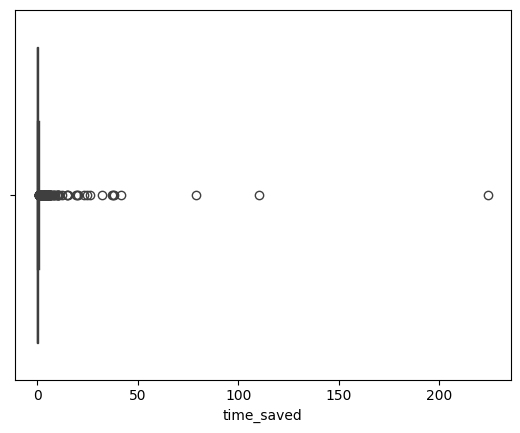

In [243]:
sns.boxplot(x=df['time_saved'])
plt.show()

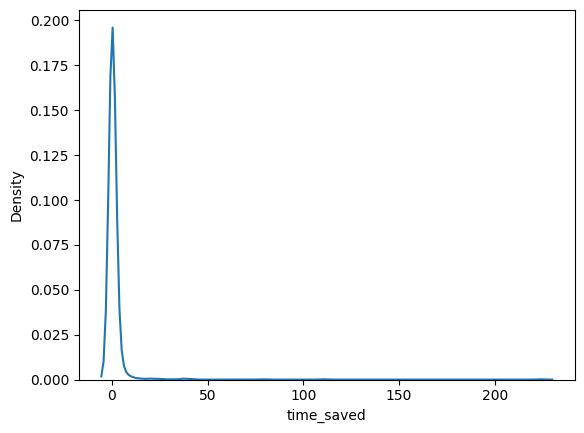

In [238]:
# Plot the histogram
sns.kdeplot(x=df['time_saved'])
plt.show()

### Base predictive model testing

In [284]:
df_test = df[(df['time_saved']>1) & (df['time_saved']<10)]
# df_test = df[(df['time_saved']>0) & (df['time_saved']<1)]
df_test.shape

(163, 32)

In [285]:
X = df_test.drop(columns=['time_saved'], inplace=False)
y = df_test['time_saved']

In [286]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Spliting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [287]:
# from sklearn.linear_model import LinearRegression

# # Create a linear regression model
# model = LinearRegression()

# # Train the model
# model.fit(X_train, y_train)

# # Make predictions on the testing set
# y_pred = model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"MSE: {mse}")
# print(f"R-squared: {r2}")

In [288]:
from sklearn.ensemble import RandomForestRegressor

# Create a linear regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 2.924886571158273
R-squared: -0.33392602595322485


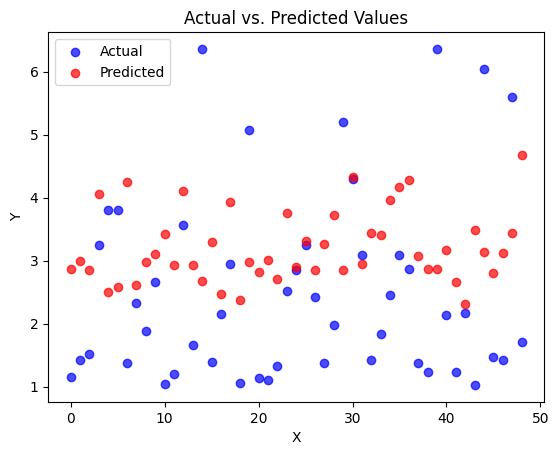

In [289]:
x = np.arange(len(y_test))
# Plot y_test and y_pred
plt.scatter(x, y_test, color='blue', label='Actual', alpha=0.7)
plt.scatter(x, y_pred, color='red', label='Predicted', alpha=0.7)

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs. Predicted Values')

# Add legend and show plot
plt.legend()
plt.show()

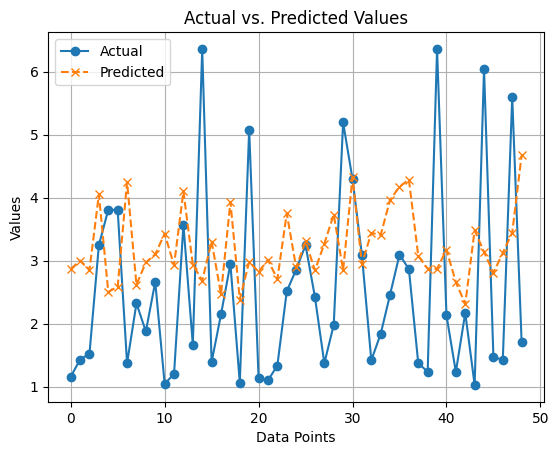

In [290]:
# Create a line plot for y_test and y_pred
plt.plot(x, y_test, label='Actual', marker='o', linestyle='-')
plt.plot(x, y_pred, label='Predicted', marker='x', linestyle='--')

# Add labels and a legend
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()